In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
import requests
from bs4 import BeautifulSoup

# Data Acquisition

## Live Demos

### Create a table from scrach:

In [3]:
pd.DataFrame({"name":["Ivan", "Goro"], "surname":["Angelov", "Hristov"], "age":[34, 45]})

,name,surname,age
0,Ivan,Angelov,34
1,Goro,Hristov,45


### Read from a scv file 

The file path depends on where the linked JupyterNotebook is:

In [4]:
accidents = pd.read_csv("data/accidents.csv")

In [5]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [6]:
accidents.index

RangeIndex(start=0, stop=6, step=1)

In [7]:
accidents.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [8]:
accidents["Miles from Home"]

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [9]:
type(accidents["Miles from Home"])

pandas.core.series.Series

In [10]:
type(accidents)

pandas.core.frame.DataFrame

Rename the columns. If the columns' names have no intervals or do not start with an integer, we can use them for easier access:  table_name.col_name 

In [11]:
accidents.columns = ["miles_from_home", "pct_of_accidents"]

In [12]:
accidents

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


Direct call the particular column values (if the column's name is in proper format)

In [13]:
accidents.miles_from_home

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: miles_from_home, dtype: object

Quick check how many cols and rows there are in the table using $ .shape $

In [14]:
accidents.shape

(6, 2)

Descriptive data stats $ .describe() $е. For easier reading we can use data transpose $ .Т $

In [15]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_of_accidents,6.0,16.666667,8.733079,6.0,10.25,17.0,21.5,29.0


Data types check in the table using  $ .dtypes $

In [16]:
accidents.dtypes

miles_from_home     object
pct_of_accidents     int64
dtype: object

Indeces change:

In [17]:
accidents.index = [7, 17, 20, 4, 2, -1]

In [18]:
accidents

,miles_from_home,pct_of_accidents
7,less than 1,23
17,1 to 5,29
20,6 to 10,17
4,11 to 15,8
2,16 to 20,6
-1,over 20,17


### Read data from web

In [19]:
data = pd.read_csv("https://github.com/plotly/datasets/raw/master/data.csv")

In [20]:
data.shape

(150000, 11)

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [22]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Without the metadata (what is behind the columns' names) we cannot be sure what is the meaning of the data. For example: what is behind the $age$ fields? Years of what?

In [23]:
metadata = pd.read_csv("https://github.com/plotly/datasets/raw/master/data_dictionary.csv")

In [24]:
metadata

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


След като намерим метаданните, вече можем да намерим и информацията, че age e Age of borrower in years. 
Освен това първото поле SeriousDlqin2yrs е boolean със стойности Y/N, а в нашите данни това се е превърнало в int64 със стойности 1/0; така, че такива стойности като mean & std нямат особен смисъл.
За да поправим това, полето тр да се презапише като тип category.

In [25]:
data.SeriousDlqin2yrs = data.SeriousDlqin2yrs.astype("category")

In [26]:
data.dtypes

SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

Всички промени, които правим по файловете, се отразяват само в паметта.

In [27]:
green_trip = data_excel = pd.read_excel("data/green_tripdata_2015-09.xls")


In [28]:
green_trip

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [29]:
green_trip.shape

(65535, 21)

In [30]:
green_trip.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,65535.0,1.784497,1.0,2.0,2.0,2.0,2.0,0.411174
lpep_pickup_datetime,65535,2015-09-01 21:41:36.600595200,2015-09-01 00:00:00,2015-09-01 13:17:26,2015-09-01 20:08:37,2015-09-02 08:35:17,2015-09-02 16:59:45,NaN
Lpep_dropoff_datetime,65535,2015-09-01 21:56:13.970427904,2015-09-01 00:00:00,2015-09-01 13:30:47,2015-09-01 20:21:49,2015-09-02 08:51:38.500000,2015-09-03 16:09:19,NaN
RateCodeID,65535.0,1.12491,1.0,1.0,1.0,1.0,99.0,0.781101
Pickup_longitude,65535.0,-73.808157,-75.056404,-73.958015,-73.944176,-73.915222,0.0,3.04051
Pickup_latitude,65535.0,40.685263,0.0,40.70067,40.753559,40.804974,41.032986,1.676843
Dropoff_longitude,65535.0,-73.851127,-75.081306,-73.967205,-73.94474,-73.909496,0.0,2.466746
Dropoff_latitude,65535.0,40.706524,0.0,40.704659,40.754356,40.798569,41.227257,1.360617
Passenger_count,65535.0,1.349432,0.0,1.0,1.0,1.0,9.0,1.023215
Trip_distance,65535.0,2.901488,0.0,1.02,1.88,3.65,62.34,3.026139


In [31]:
green_trip.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

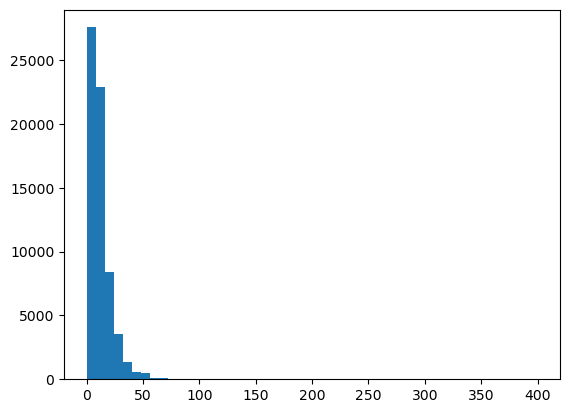

In [32]:
#понеже явно има отрицателни стойности, то ограничаваме да се виждат само положителните в хистограмата
plt.hist(green_trip.Fare_amount[green_trip.Fare_amount>0], bins = 50) 
plt.show()

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking.

The skew() method calculates the skew for each column. By specifying the column axis ( axis='columns' ), the skew() method searches column-wise and returns the skew of each row.

In [33]:
green_trip.Fare_amount[green_trip.Fare_amount>0].skew()

7.01369599688203

A skewness of 7 in `green_trip.Fare_amount[green_trip.Fare_amount>0]` indicates a highly positive skew. This means:

- The distribution of fare amounts is heavily right-skewed.
- Most fare amounts are clustered at lower values, with a few significantly higher fares pulling the mean to the right.
- There may be outliers or extreme values that impact the distribution.

This suggests that while most fares are low, there are occasional high fares that affect the overall distribution.

### Read from API

In [34]:
read_api = pd.read_json("https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json")
read_api.T

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,restricted,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,restricted,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,restricted,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


With no transpose we will receive the books as columns. Another way to have the books in rows is $orient = "index"$

In [35]:
read_api = pd.read_json(
    "https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json",
orient="index"
)
read_api

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,restricted,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,restricted,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,restricted,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


In [36]:
pd.read_json( "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m", orient="columns")


,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,current_units,current,hourly_units,hourly
time,52.52,13.419998,0.112057,0,GMT,GMT,38,iso8601,2024-06-30T21:30,iso8601,"[2024-06-30T00:00, 2024-06-30T01:00, 2024-06-3..."
interval,52.52,13.419998,0.112057,0,GMT,GMT,38,seconds,900,NaN,NaN
temperature_2m,52.52,13.419998,0.112057,0,GMT,GMT,38,°C,18.0,°C,"[23.3, 22.8, 22.5, 22.8, 23.0, 20.8, 21.0, 22...."
wind_speed_10m,52.52,13.419998,0.112057,0,GMT,GMT,38,km/h,8.0,km/h,"[10.2, 12.0, 9.9, 10.8, 9.2, 10.5, 9.4, 5.3, 1..."
relative_humidity_2m,52.52,13.419998,0.112057,0,GMT,GMT,38,NaN,NaN,%,"[67, 70, 72, 72, 72, 92, 90, 81, 77, 76, 73, 7..."


In [37]:
pd.read_json( "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m", orient="index")


,0
latitude,52.52
longitude,13.419998
generationtime_ms,0.090957
utc_offset_seconds,0
timezone,GMT
timezone_abbreviation,GMT
elevation,38.0
current_units,"{'time': 'iso8601', 'interval': 'seconds', 'te..."
current,"{'time': '2024-06-30T21:30', 'interval': 900, ..."
hourly_units,"{'time': 'iso8601', 'temperature_2m': '°C', 'r..."


In [38]:
pd.read_json( "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m")


,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,current_units,current,hourly_units,hourly
time,52.52,13.419998,0.131965,0,GMT,GMT,38,iso8601,2024-06-30T21:30,iso8601,"[2024-06-30T00:00, 2024-06-30T01:00, 2024-06-3..."
interval,52.52,13.419998,0.131965,0,GMT,GMT,38,seconds,900,NaN,NaN
temperature_2m,52.52,13.419998,0.131965,0,GMT,GMT,38,°C,18.0,°C,"[23.3, 22.8, 22.5, 22.8, 23.0, 20.8, 21.0, 22...."
wind_speed_10m,52.52,13.419998,0.131965,0,GMT,GMT,38,km/h,8.0,km/h,"[10.2, 12.0, 9.9, 10.8, 9.2, 10.5, 9.4, 5.3, 1..."
relative_humidity_2m,52.52,13.419998,0.131965,0,GMT,GMT,38,NaN,NaN,%,"[67, 70, 72, 72, 72, 92, 90, 81, 77, 76, 73, 7..."


### We can read lite sql format

`sqlalchemy.create_engine("sqlite:///path_to_ou_file.db")`
`pd.read_sql_table("Product", engine)`

or
`pd.read_sql("select * from Product limit 4", engine)`

It is not good practice to alter sql table with $pandas$. We should use it only for reading and analysing data. 

### Web Scraping and Crawling

Get data from web as html tables, data. For example: https://www.scrapethissite.com/pages/simple/

In [39]:
countries_page = requests.get("https://www.scrapethissite.com/pages/simple/") #result in bytes

In [40]:
type(countries_page)

requests.models.Response

In [41]:
parser = BeautifulSoup(countries_page.content, "html.parser")

In [42]:
rows = parser.find(id = "countries").find_all("div", class_ = "row")
rows[10].find_all("h3", class_ = "country-name")

[<h3 class="country-name">
 <i class="flag-icon flag-icon-bg"></i>
                             Bulgaria
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-bh"></i>
                             Bahrain
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-bi"></i>
                             Burundi
                         </h3>]